In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_nodes(nr_parts, d):
    return np.random.randn(nr_parts, d)

In [3]:
def update_node(i, x, Ri, alpha, f_prime):
    numerator = np.sum([x[j] for j in Ri], axis=0) - alpha * f_prime(x[i])
    denominator = len(Ri)
    return numerator / denominator

In [4]:
def decentralized_optimizer(nr_parts, d, alpha, error_threshold, max_iterations, local_objective_derivative):
    x_init = initialize_nodes(nr_parts, d)
    x = x_init.copy()
    train_loss = np.zeros((max_iterations, nr_parts))

    for iteration in range(max_iterations):
        for i in range(nr_parts):
            neighbors = list(range(nr_parts))  # Replace with your definition of Ni
            Ri = [j for j in neighbors if np.all(x[i, :] <= x[j, :]) and np.all(x[j, :] <= x[i, :])]
            x[i, :] = update_node(i, x, Ri, alpha, local_objective_derivative)  # Replace f_prime with your definition of f_prime
            train_loss[iteration, i] = np.linalg.norm(x[i, :])

        # Check convergence
        if iteration > 0:
            pairwise_distances = np.linalg.norm(x - x_prev, axis=1)
            if all(distance < error_threshold for distance in pairwise_distances):
                break

        x_prev = x.copy()

    return x, train_loss[:iteration + 1, :]


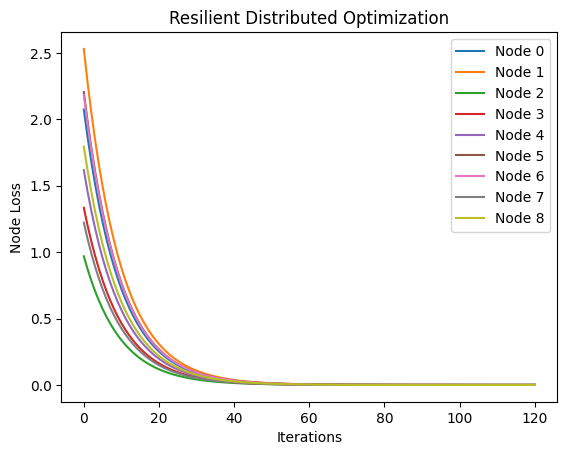

In [5]:
nr_parts = 9
d = 5
alpha = 0.1  # Adjust as needed
error_threshold = 1e-6  # Adjust as needed
max_iterations = 1000

def local_objective_derivative(x):
    # Replace this with the derivative of your local objective function
    return x

x_opt, train_loss = decentralized_optimizer(nr_parts, d, alpha, error_threshold, max_iterations, local_objective_derivative)

# Plotting
for i in range(nr_parts):
    plt.plot(np.arange(0, train_loss.shape[0]), train_loss[:, i], label=f'Node {i}')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Node Loss')
plt.title('Resilient Distributed Optimization')
plt.show()